# Standard GAN Implementation
### CSC 4631 Final Project

In [10]:
# Imports
import numpy as np
import sys
import torch
import torch.nn as nn
import torch.optim as optim
from ucimlrepo import fetch_ucirepo
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

In [11]:
# fetch dataset 
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80) 
  
# data (as pandas dataframes) 
X = optical_recognition_of_handwritten_digits.data.features 
y = optical_recognition_of_handwritten_digits.data.targets 
  
# metadata 
print(optical_recognition_of_handwritten_digits.metadata) 
  
# variable information 
print(optical_recognition_of_handwritten_digits.variables) 

{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'ID': 280, 'type': 'NATIVE', 'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'venue': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, 

## Implement

In [12]:
# Convert features to numpy, then to tensor
X = X.to_numpy(dtype=float)  # shape (n_samples, 64)
n_samples = X.shape[0]

# Rescale from [0,16] → [-1, 1]
X = X / 16.0  # [0, 1]
X = X * 2 - 1  # [-1, 1]

# Reshape
X = X.reshape(n_samples, 1, 8, 8)  # (samples, channel, height, width)

# Make a PyTorch dataset
tensor_X = torch.tensor(X, dtype=torch.float32)
dl = DataLoader(TensorDataset(tensor_X), batch_size=64, shuffle=True)

In [13]:
class Generator(nn.Module):
    def __init__(self, latent_dim, img_shape):
        super().__init__()
        self.img_dim = int(torch.prod(torch.tensor(img_shape)))
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(True),
            nn.Linear(128, 256),
            nn.ReLU(True),
            nn.Linear(256, self.img_dim),
            nn.Tanh(),  # because images are scaled to [-1,1]
        )

    def forward(self, z):
        img_flat = self.model(z)
        img = img_flat.view(z.size(0), *img_shape)
        return img

In [14]:
class Discriminator(nn.Module):
    def __init__(self, img_shape):
        super().__init__()
        self.img_dim = int(torch.prod(torch.tensor(img_shape)))
        self.model = nn.Sequential(
            nn.Linear(self.img_dim, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(128, 1),
            nn.Sigmoid(),
        )
    def forward(self, img):
        img_flat = img.view(img.size(0), -1)
        validity = self.model(img_flat)
        return validity

In [15]:
latent_dim = 100
img_shape = (1, 8, 8)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

gen = Generator(latent_dim, img_shape).to(device)
disc = Discriminator(img_shape).to(device)

In [16]:
optimizer_G = optim.Adam(gen.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(disc.parameters(), lr=0.0002, betas=(0.5, 0.999))
criterion = nn.BCELoss()

Epoch [1/200]  Loss_D: 0.6437  Loss_G: 0.7034
Epoch [2/200]  Loss_D: 0.6420  Loss_G: 0.7682
Epoch [3/200]  Loss_D: 0.4091  Loss_G: 1.2941
Epoch [4/200]  Loss_D: 0.3695  Loss_G: 1.4909
Epoch [5/200]  Loss_D: 0.3758  Loss_G: 1.6900
Epoch [6/200]  Loss_D: 0.3448  Loss_G: 1.7570
Epoch [7/200]  Loss_D: 0.2126  Loss_G: 2.1611
Epoch [8/200]  Loss_D: 0.5180  Loss_G: 1.6519
Epoch [9/200]  Loss_D: 0.2393  Loss_G: 2.1208
Epoch [10/200]  Loss_D: 0.2799  Loss_G: 2.2077
Epoch [11/200]  Loss_D: 0.2195  Loss_G: 2.4578
Epoch [12/200]  Loss_D: 0.1933  Loss_G: 2.5799
Epoch [13/200]  Loss_D: 0.2336  Loss_G: 2.3337
Epoch [14/200]  Loss_D: 0.1293  Loss_G: 2.9127
Epoch [15/200]  Loss_D: 0.1951  Loss_G: 2.6308
Epoch [16/200]  Loss_D: 0.5383  Loss_G: 1.8971
Epoch [17/200]  Loss_D: 0.3123  Loss_G: 1.9371
Epoch [18/200]  Loss_D: 0.1442  Loss_G: 2.8225
Epoch [19/200]  Loss_D: 0.2104  Loss_G: 2.3986
Epoch [20/200]  Loss_D: 0.1973  Loss_G: 3.0547


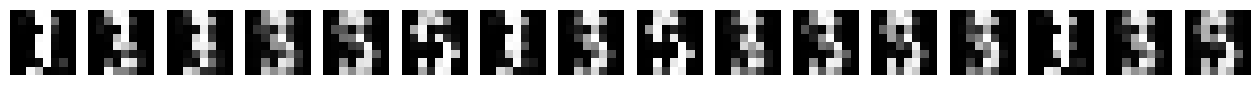

Epoch [21/200]  Loss_D: 0.2606  Loss_G: 2.5070
Epoch [22/200]  Loss_D: 0.0905  Loss_G: 2.9437
Epoch [23/200]  Loss_D: 0.1173  Loss_G: 3.2727
Epoch [24/200]  Loss_D: 0.4081  Loss_G: 2.8843
Epoch [25/200]  Loss_D: 0.2362  Loss_G: 3.0453
Epoch [26/200]  Loss_D: 0.3512  Loss_G: 2.8381
Epoch [27/200]  Loss_D: 0.3103  Loss_G: 2.5666
Epoch [28/200]  Loss_D: 0.2301  Loss_G: 2.6923
Epoch [29/200]  Loss_D: 0.1790  Loss_G: 2.1854
Epoch [30/200]  Loss_D: 0.3313  Loss_G: 2.1223
Epoch [31/200]  Loss_D: 0.3070  Loss_G: 1.8999
Epoch [32/200]  Loss_D: 0.2326  Loss_G: 2.4955
Epoch [33/200]  Loss_D: 0.2996  Loss_G: 2.6390
Epoch [34/200]  Loss_D: 0.1987  Loss_G: 2.8126
Epoch [35/200]  Loss_D: 0.3439  Loss_G: 2.0516
Epoch [36/200]  Loss_D: 0.2280  Loss_G: 2.7142
Epoch [37/200]  Loss_D: 0.2358  Loss_G: 2.3169
Epoch [38/200]  Loss_D: 0.2383  Loss_G: 2.4410
Epoch [39/200]  Loss_D: 0.3442  Loss_G: 2.8769
Epoch [40/200]  Loss_D: 0.3275  Loss_G: 1.9256


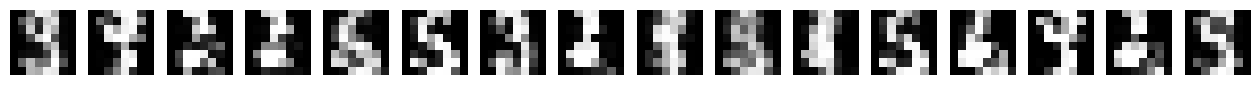

Epoch [41/200]  Loss_D: 0.3931  Loss_G: 1.8720
Epoch [42/200]  Loss_D: 0.3220  Loss_G: 2.2272
Epoch [43/200]  Loss_D: 0.2394  Loss_G: 2.8985
Epoch [44/200]  Loss_D: 0.4426  Loss_G: 1.8401
Epoch [45/200]  Loss_D: 0.2742  Loss_G: 2.8539
Epoch [46/200]  Loss_D: 0.3319  Loss_G: 2.2271
Epoch [47/200]  Loss_D: 0.3135  Loss_G: 2.5873
Epoch [48/200]  Loss_D: 0.3129  Loss_G: 2.1915
Epoch [49/200]  Loss_D: 0.2217  Loss_G: 2.0398
Epoch [50/200]  Loss_D: 0.2669  Loss_G: 2.4635
Epoch [51/200]  Loss_D: 0.3193  Loss_G: 2.4167
Epoch [52/200]  Loss_D: 0.5842  Loss_G: 1.1388
Epoch [53/200]  Loss_D: 0.3911  Loss_G: 2.6215
Epoch [54/200]  Loss_D: 0.2586  Loss_G: 2.2455
Epoch [55/200]  Loss_D: 0.3715  Loss_G: 2.2815
Epoch [56/200]  Loss_D: 0.4203  Loss_G: 2.1458
Epoch [57/200]  Loss_D: 0.3563  Loss_G: 1.6532
Epoch [58/200]  Loss_D: 0.2920  Loss_G: 1.8688
Epoch [59/200]  Loss_D: 0.4460  Loss_G: 1.8465
Epoch [60/200]  Loss_D: 0.4636  Loss_G: 1.2340


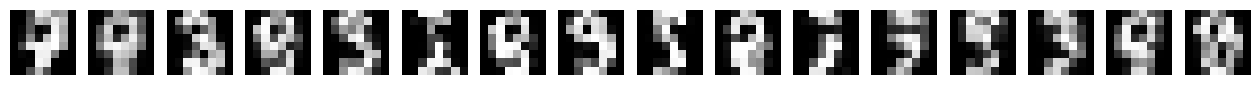

Epoch [61/200]  Loss_D: 0.3741  Loss_G: 1.8192
Epoch [62/200]  Loss_D: 0.2678  Loss_G: 2.0761
Epoch [63/200]  Loss_D: 0.3386  Loss_G: 1.9110
Epoch [64/200]  Loss_D: 0.4246  Loss_G: 1.3533
Epoch [65/200]  Loss_D: 0.3408  Loss_G: 1.7755
Epoch [66/200]  Loss_D: 0.4102  Loss_G: 1.6149
Epoch [67/200]  Loss_D: 0.4081  Loss_G: 1.5602
Epoch [68/200]  Loss_D: 0.3506  Loss_G: 1.7690
Epoch [69/200]  Loss_D: 0.3948  Loss_G: 1.7953
Epoch [70/200]  Loss_D: 0.3633  Loss_G: 1.7961
Epoch [71/200]  Loss_D: 0.3737  Loss_G: 2.1591
Epoch [72/200]  Loss_D: 0.3453  Loss_G: 2.2807
Epoch [73/200]  Loss_D: 0.3051  Loss_G: 1.6820
Epoch [74/200]  Loss_D: 0.2750  Loss_G: 1.9497
Epoch [75/200]  Loss_D: 0.4522  Loss_G: 1.4255
Epoch [76/200]  Loss_D: 0.2895  Loss_G: 2.0064
Epoch [77/200]  Loss_D: 0.4347  Loss_G: 1.6510
Epoch [78/200]  Loss_D: 0.5390  Loss_G: 1.4305
Epoch [79/200]  Loss_D: 0.4523  Loss_G: 1.5750
Epoch [80/200]  Loss_D: 0.4296  Loss_G: 1.4144


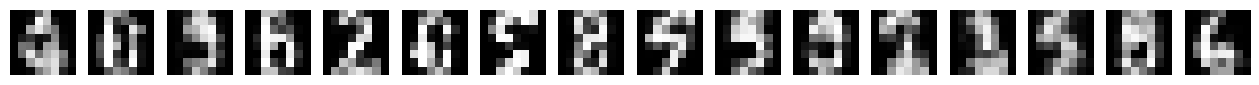

Epoch [81/200]  Loss_D: 0.6467  Loss_G: 0.8036
Epoch [82/200]  Loss_D: 0.4261  Loss_G: 1.3057
Epoch [83/200]  Loss_D: 0.5398  Loss_G: 1.6197
Epoch [84/200]  Loss_D: 0.4437  Loss_G: 1.6872
Epoch [85/200]  Loss_D: 0.5139  Loss_G: 1.2810
Epoch [86/200]  Loss_D: 0.5469  Loss_G: 1.3783
Epoch [87/200]  Loss_D: 0.4843  Loss_G: 1.5305
Epoch [88/200]  Loss_D: 0.4370  Loss_G: 1.6359
Epoch [89/200]  Loss_D: 0.5450  Loss_G: 1.3171
Epoch [90/200]  Loss_D: 0.5082  Loss_G: 1.4821
Epoch [91/200]  Loss_D: 0.4894  Loss_G: 1.5016
Epoch [92/200]  Loss_D: 0.4787  Loss_G: 1.3378
Epoch [93/200]  Loss_D: 0.4473  Loss_G: 1.3053
Epoch [94/200]  Loss_D: 0.6191  Loss_G: 1.3706
Epoch [95/200]  Loss_D: 0.5402  Loss_G: 1.1804
Epoch [96/200]  Loss_D: 0.5404  Loss_G: 1.1991
Epoch [97/200]  Loss_D: 0.4929  Loss_G: 1.4885
Epoch [98/200]  Loss_D: 0.5327  Loss_G: 1.2776
Epoch [99/200]  Loss_D: 0.4870  Loss_G: 0.9840
Epoch [100/200]  Loss_D: 0.5479  Loss_G: 1.1654


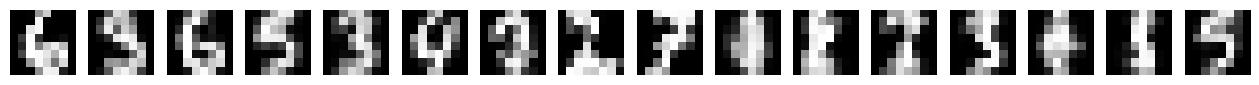

Epoch [101/200]  Loss_D: 0.4789  Loss_G: 1.2342
Epoch [102/200]  Loss_D: 0.5187  Loss_G: 1.3461
Epoch [103/200]  Loss_D: 0.5362  Loss_G: 1.2532
Epoch [104/200]  Loss_D: 0.4774  Loss_G: 1.5363
Epoch [105/200]  Loss_D: 0.5566  Loss_G: 0.7931
Epoch [106/200]  Loss_D: 0.5766  Loss_G: 1.4313
Epoch [107/200]  Loss_D: 0.5912  Loss_G: 1.4419
Epoch [108/200]  Loss_D: 0.5680  Loss_G: 0.9350
Epoch [109/200]  Loss_D: 0.5090  Loss_G: 1.4237
Epoch [110/200]  Loss_D: 0.5702  Loss_G: 1.3311
Epoch [111/200]  Loss_D: 0.5804  Loss_G: 0.9966
Epoch [112/200]  Loss_D: 0.6519  Loss_G: 1.2321
Epoch [113/200]  Loss_D: 0.4703  Loss_G: 1.2425
Epoch [114/200]  Loss_D: 0.6604  Loss_G: 0.9333
Epoch [115/200]  Loss_D: 0.5356  Loss_G: 1.1974
Epoch [116/200]  Loss_D: 0.5588  Loss_G: 1.2068
Epoch [117/200]  Loss_D: 0.5264  Loss_G: 1.1878
Epoch [118/200]  Loss_D: 0.6302  Loss_G: 1.0943
Epoch [119/200]  Loss_D: 0.5143  Loss_G: 1.3317
Epoch [120/200]  Loss_D: 0.5550  Loss_G: 1.3422


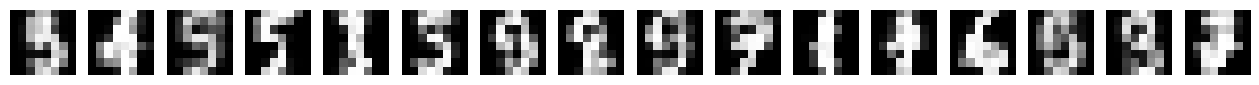

Epoch [121/200]  Loss_D: 0.6004  Loss_G: 1.0525
Epoch [122/200]  Loss_D: 0.5603  Loss_G: 1.0052
Epoch [123/200]  Loss_D: 0.5472  Loss_G: 1.3013
Epoch [124/200]  Loss_D: 0.5883  Loss_G: 1.0383
Epoch [125/200]  Loss_D: 0.6693  Loss_G: 0.9744
Epoch [126/200]  Loss_D: 0.5651  Loss_G: 1.3268
Epoch [127/200]  Loss_D: 0.5734  Loss_G: 1.0069
Epoch [128/200]  Loss_D: 0.5066  Loss_G: 1.2596
Epoch [129/200]  Loss_D: 0.5632  Loss_G: 0.9883
Epoch [130/200]  Loss_D: 0.5248  Loss_G: 1.1913
Epoch [131/200]  Loss_D: 0.6414  Loss_G: 0.9557
Epoch [132/200]  Loss_D: 0.5352  Loss_G: 1.2961
Epoch [133/200]  Loss_D: 0.6453  Loss_G: 0.9156
Epoch [134/200]  Loss_D: 0.6631  Loss_G: 1.0775
Epoch [135/200]  Loss_D: 0.5603  Loss_G: 1.1217
Epoch [136/200]  Loss_D: 0.5542  Loss_G: 1.0618
Epoch [137/200]  Loss_D: 0.6246  Loss_G: 1.2772
Epoch [138/200]  Loss_D: 0.5909  Loss_G: 1.0862
Epoch [139/200]  Loss_D: 0.6429  Loss_G: 0.9725
Epoch [140/200]  Loss_D: 0.5786  Loss_G: 1.1737


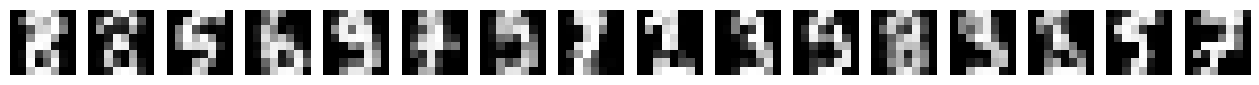

Epoch [141/200]  Loss_D: 0.4986  Loss_G: 1.2159
Epoch [142/200]  Loss_D: 0.5980  Loss_G: 1.1387
Epoch [143/200]  Loss_D: 0.6049  Loss_G: 1.0835
Epoch [144/200]  Loss_D: 0.6403  Loss_G: 0.8942
Epoch [145/200]  Loss_D: 0.6025  Loss_G: 0.8499
Epoch [146/200]  Loss_D: 0.5760  Loss_G: 1.1153
Epoch [147/200]  Loss_D: 0.5165  Loss_G: 1.2274
Epoch [148/200]  Loss_D: 0.5671  Loss_G: 1.0932
Epoch [149/200]  Loss_D: 0.5807  Loss_G: 1.0666
Epoch [150/200]  Loss_D: 0.5508  Loss_G: 1.1389
Epoch [151/200]  Loss_D: 0.6067  Loss_G: 1.1271
Epoch [152/200]  Loss_D: 0.6440  Loss_G: 0.9473
Epoch [153/200]  Loss_D: 0.5423  Loss_G: 1.0981
Epoch [154/200]  Loss_D: 0.6173  Loss_G: 1.0590
Epoch [155/200]  Loss_D: 0.5546  Loss_G: 1.0807
Epoch [156/200]  Loss_D: 0.4958  Loss_G: 1.4029
Epoch [157/200]  Loss_D: 0.5187  Loss_G: 1.1060
Epoch [158/200]  Loss_D: 0.6349  Loss_G: 1.2883
Epoch [159/200]  Loss_D: 0.5319  Loss_G: 1.1597
Epoch [160/200]  Loss_D: 0.6291  Loss_G: 1.1709


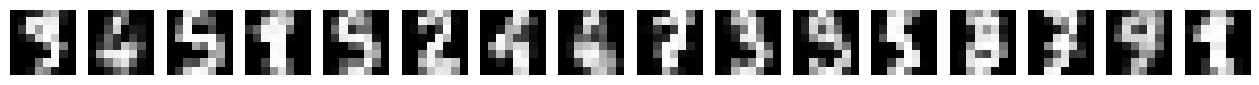

Epoch [161/200]  Loss_D: 0.5450  Loss_G: 1.2848
Epoch [162/200]  Loss_D: 0.5627  Loss_G: 1.1360
Epoch [163/200]  Loss_D: 0.5720  Loss_G: 1.0013
Epoch [164/200]  Loss_D: 0.6670  Loss_G: 1.1473
Epoch [165/200]  Loss_D: 0.6357  Loss_G: 0.8658
Epoch [166/200]  Loss_D: 0.5717  Loss_G: 1.2790
Epoch [167/200]  Loss_D: 0.5773  Loss_G: 1.0399
Epoch [168/200]  Loss_D: 0.5320  Loss_G: 1.0719
Epoch [169/200]  Loss_D: 0.5635  Loss_G: 1.1913
Epoch [170/200]  Loss_D: 0.5675  Loss_G: 1.0231
Epoch [171/200]  Loss_D: 0.5805  Loss_G: 1.1894
Epoch [172/200]  Loss_D: 0.6208  Loss_G: 1.0352
Epoch [173/200]  Loss_D: 0.5956  Loss_G: 0.8669
Epoch [174/200]  Loss_D: 0.5624  Loss_G: 0.8445
Epoch [175/200]  Loss_D: 0.5975  Loss_G: 0.9252
Epoch [176/200]  Loss_D: 0.5849  Loss_G: 1.1658
Epoch [177/200]  Loss_D: 0.5613  Loss_G: 0.8068
Epoch [178/200]  Loss_D: 0.6467  Loss_G: 1.0034
Epoch [179/200]  Loss_D: 0.5325  Loss_G: 1.0559
Epoch [180/200]  Loss_D: 0.6106  Loss_G: 1.0279


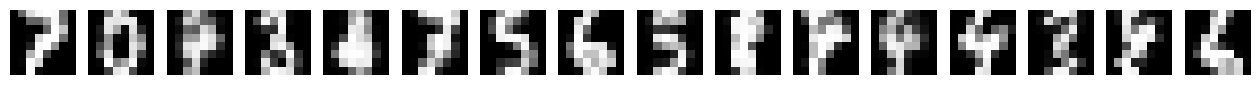

Epoch [181/200]  Loss_D: 0.7032  Loss_G: 0.7940
Epoch [182/200]  Loss_D: 0.5581  Loss_G: 0.9654
Epoch [183/200]  Loss_D: 0.6474  Loss_G: 0.8597
Epoch [184/200]  Loss_D: 0.5762  Loss_G: 1.1630
Epoch [185/200]  Loss_D: 0.6046  Loss_G: 1.1853
Epoch [186/200]  Loss_D: 0.5438  Loss_G: 0.9883
Epoch [187/200]  Loss_D: 0.5937  Loss_G: 0.8807
Epoch [188/200]  Loss_D: 0.6335  Loss_G: 0.8676
Epoch [189/200]  Loss_D: 0.5910  Loss_G: 1.0335
Epoch [190/200]  Loss_D: 0.6224  Loss_G: 0.9247
Epoch [191/200]  Loss_D: 0.5718  Loss_G: 0.8595
Epoch [192/200]  Loss_D: 0.5790  Loss_G: 0.9174
Epoch [193/200]  Loss_D: 0.6065  Loss_G: 0.9256
Epoch [194/200]  Loss_D: 0.5731  Loss_G: 1.1138
Epoch [195/200]  Loss_D: 0.5467  Loss_G: 0.9777
Epoch [196/200]  Loss_D: 0.6628  Loss_G: 1.0414
Epoch [197/200]  Loss_D: 0.5791  Loss_G: 1.0182
Epoch [198/200]  Loss_D: 0.6840  Loss_G: 1.4918
Epoch [199/200]  Loss_D: 0.6319  Loss_G: 1.0725
Epoch [200/200]  Loss_D: 0.5893  Loss_G: 0.9393


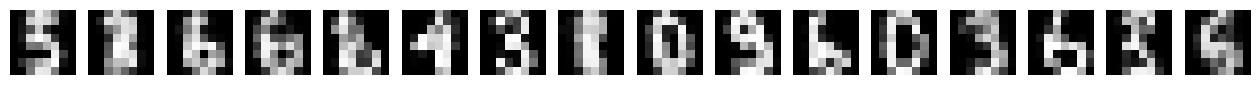

Training finished.


In [17]:
# Labels
real_label = 1.0
fake_label = 0.0

# Training parameters
n_epochs = 200

# --- Training Loop ---
for epoch in range(n_epochs):
    for batch_idx, (real_imgs,) in enumerate(dl):
        real_imgs = real_imgs.to(device)
        batch_size_curr = real_imgs.size(0)

        # Train Discriminator
        optimizer_D.zero_grad()

        # Real images
        labels_real = torch.full((batch_size_curr, 1), real_label, device=device)
        output_real = disc(real_imgs)
        loss_real = criterion(output_real, labels_real)

        # Fake images
        noise = torch.randn(batch_size_curr, latent_dim, device=device)
        fake_imgs = gen(noise)
        labels_fake = torch.full((batch_size_curr, 1), fake_label, device=device)
        output_fake = disc(fake_imgs.detach())
        loss_fake = criterion(output_fake, labels_fake)

        loss_D = (loss_real + loss_fake) / 2
        loss_D.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        labels_for_G = torch.full((batch_size_curr, 1), real_label, device=device)  # trick: want generator to fool D
        output_for_G = disc(fake_imgs)
        loss_G = criterion(output_for_G, labels_for_G)
        loss_G.backward()
        optimizer_G.step()

    # Print progress
    print(f"Epoch [{epoch+1}/{n_epochs}]  Loss_D: {loss_D.item():.4f}  Loss_G: {loss_G.item():.4f}")

    # Optionally: generate and display samples every few epochs
    if (epoch + 1) % 20 == 0:
        with torch.no_grad():
            test_noise = torch.randn(16, latent_dim, device=device)
            test_fake = gen(test_noise).cpu()
        fig, axes = plt.subplots(1, 16, figsize=(16, 1))
        for i in range(16):
            axes[i].imshow(test_fake[i, 0], cmap="gray", vmin=-1, vmax=1)
            axes[i].axis("off")
        plt.show()

print("Training finished.")